<a href="https://colab.research.google.com/github/lutakrystal305/torch_tutorial/blob/main/Torch_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt


In [ ]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
])
cifar10 = datasets.CIFAR10('/content/',train=True, download=True, transform=transform)
cifar10_val = datasets.CIFAR10('/content/',train=False, download=True, transform=transform)


Extracting /content/cifar-10-python.tar.gz to /content/
Files already downloaded and verified


In [ ]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=True)


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 8, 3, 1)
        self.fc1 = nn.Linear(288, 32)
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        #print(x.shape)
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        #print(out.shape)
        out = out.view(-1, 288)
        #print(out.shape)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [ ]:
def training(epochs, optimizer, model, loss_fn, train_loader, val_loader):
    for epoch in range(1, epochs+1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            #print('labels shape: ',labels.shape)
            #print('imgs shape: ', imgs.shape)
            outputs = model(imgs)
            #print('outputs shape: ',outputs.shape)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
        correct = 0
        with torch.no_grad():
            for data in val_loader:
                images, labels = data
                outputs = model(images)
                _, predict = torch.max(outputs, 1)
                print(predict)
                c = (predict == labels).squeeze()
                print('c: ', c)
                correct += c.sum()
        if epoch == 1 or epoch % 1 == 0:
            print('Epoch {}, Training loss {}, Val accuracy {}'.format(
                epoch,
                loss_train / len(train_loader),
                correct / len(cifar10_val)))

In [ ]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr=3e-2)
loss_fn = nn.CrossEntropyLoss()

training(30, optimizer, model, loss_fn, train_loader, val_loader)


imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  torch.Size([64, 3, 32, 32])
imgs shape:  tor

KeyboardInterrupt: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 32, 32])
tensor([[ 0.6781, -0.1339, -0.3441, -0.2368, -0.4647, -0.3194, -0.6019, -0.6116,
          0.8562,  0.4731]], grad_fn=<AddmmBackward>)
tensor(8)
9
torch.Size([32, 32, 3])


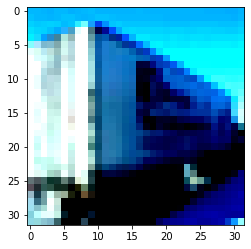

In [ ]:
img, label = cifar10[15]
x = img.unsqueeze(0)
print(x.shape)
output = model(x)
print(output)
y = torch.argmax(output)
print(y)
print(label)
img = img.swapaxes(0,1)
img = img.swapaxes(1,2)
print(img.shape)
plt.imshow(img)